### Unsupervised Learning**

---


In [122]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('credit_card.csv')
df.shape

(8950, 18)

In [3]:
# After reading the dataset, let’s check its top 5 rows using head() method to just see how the data looks.
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

###  **Q.1 Basic Primary Analysis**

---


In [18]:
sns.set_style("darkgrid")
plt.figure(figsize=(7,7))

<Figure size 504x504 with 0 Axes>

<Figure size 504x504 with 0 Axes>

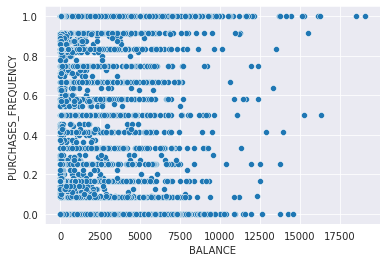

In [19]:
sns.scatterplot(x='BALANCE',y='PURCHASES_FREQUENCY',data=df)

In [123]:
df['CUST_ID'].describe()

count       8950
unique      8950
top       C10001
freq           1
Name: CUST_ID, dtype: object

###  **Q.2 Basic Exploratory Analysis**

---

**a. Missing Value Analysis**

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# to see what percentage of the values in the dataset were missing
total = np.product(df.shape)
count = df.isnull().sum()
total_missing =count.sum()

# percent of data that is missing
(total_missing/total)*100

0.19490999379267535

***Only 0.19% percent of data are missing from the dataset***

**Handling Missing Values**

In [11]:
# The column 'MINIMUM_PAYMENTS'  has 313 missing values, since it is a numerical variable the missing values in that column can be filled with mean 
#replacing  'MINIMUM_PAYMENTS'  column with mean value
mean_value=df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS'].fillna(value=mean_value,inplace=True)

In [16]:
mean_value=df['CREDIT_LIMIT'].mean()
df['CREDIT_LIMIT'].fillna(value=mean_value,inplace=True)

**b. Outlier Treatment with using Z-score method**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


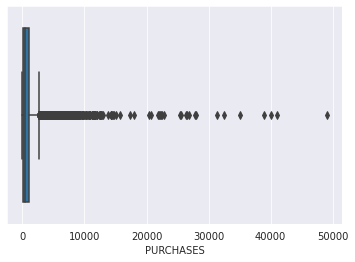

In [35]:
sns.boxplot(df.PURCHASES)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

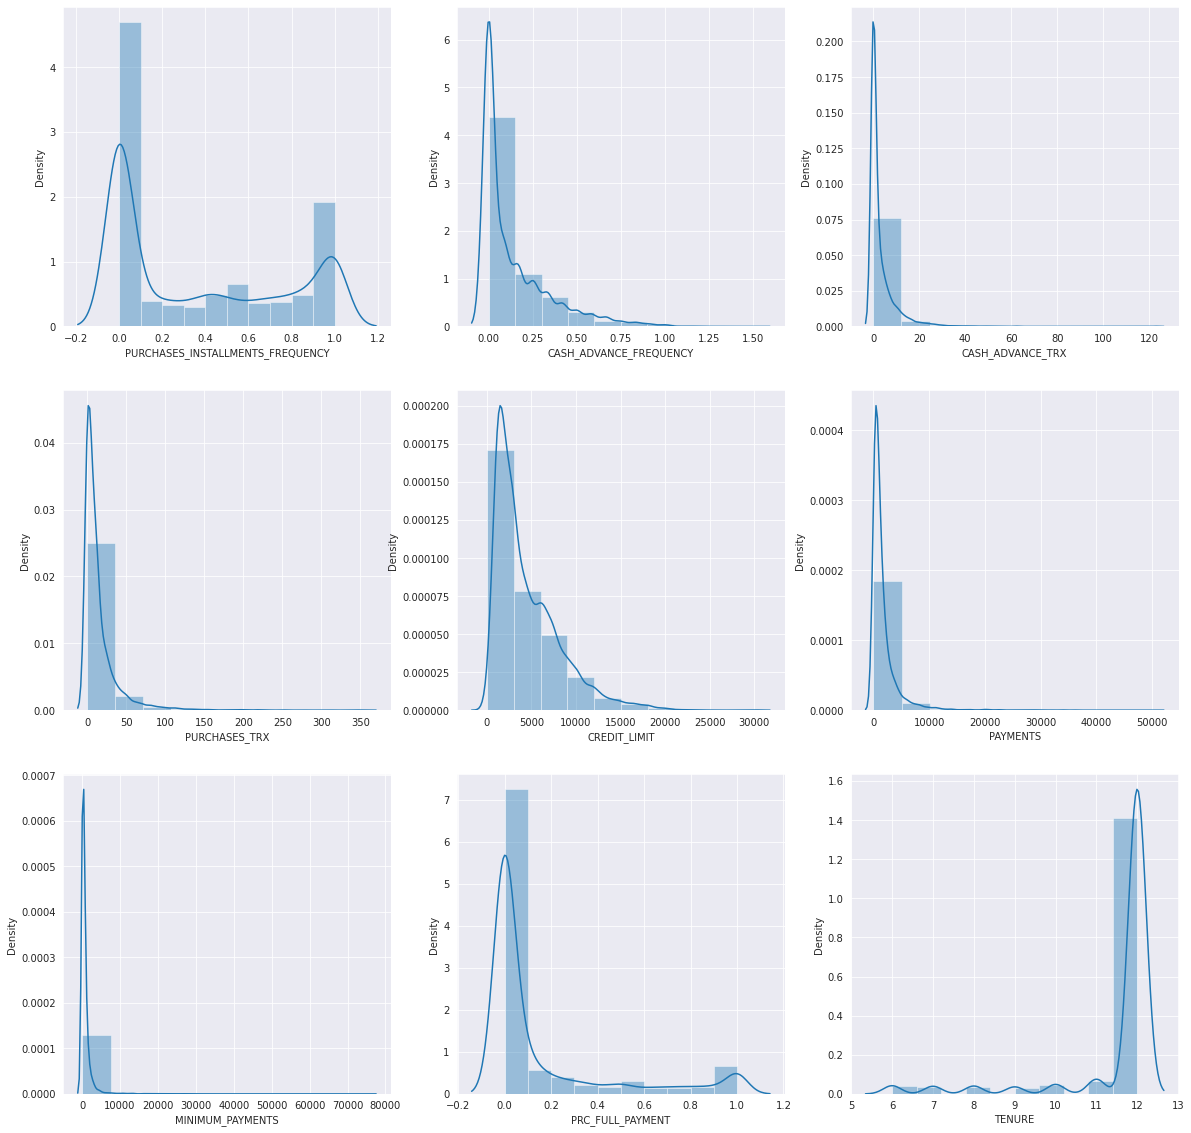

In [52]:
f, ax = plt.subplots(3,3, figsize=(20,20))
fig1= sns.distplot(df["PURCHASES_INSTALLMENTS_FREQUENCY"],bins=10, ax= ax[0,0])
fig2 = sns.distplot(df["CASH_ADVANCE_FREQUENCY"],bins=10, ax=ax[0,1])
fig3 = sns.distplot(df["CASH_ADVANCE_TRX"],bins=10, ax= ax[0,2])
fig4 = sns.distplot(df["PURCHASES_TRX"],bins=10, ax=ax[1,0])
fig5 = sns.distplot(df["CREDIT_LIMIT"],bins=10, ax= ax[1,1])
fig6 = sns.distplot(df["PAYMENTS"],bins=10, ax=ax[1,2])
fig7 = sns.distplot(df["MINIMUM_PAYMENTS"],bins=10, ax= ax[2,0])
fig8 = sns.distplot(df["PRC_FULL_PAYMENT"],bins=10, ax=ax[2,1])
fig9 = sns.distplot(df["TENURE"],bins=10, ax=ax[2,2])


In [36]:
from scipy.stats import zscore     # To Apply Zscore Treatment

z = np.abs(zscore(df['PURCHASES'])) 

In [43]:
df['Zscore'] = z

len(df[df['Zscore']>2])

256

In [44]:
df_z = df[df['Zscore']<3]      # Store less then 3 Z-Score value To the Variable
print('Removed outlier data set shape :-',df_z.shape  ) 

Removed outlier data set shape :- (8815, 19)


In [45]:
df.shape

(8950, 19)

In [46]:
df_z.shape # the outliers of the dataset has been dropped

(8815, 19)

**c. Dealing with correlated variables**





In [58]:
df.drop('Zscore',axis=1,inplace=True)
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


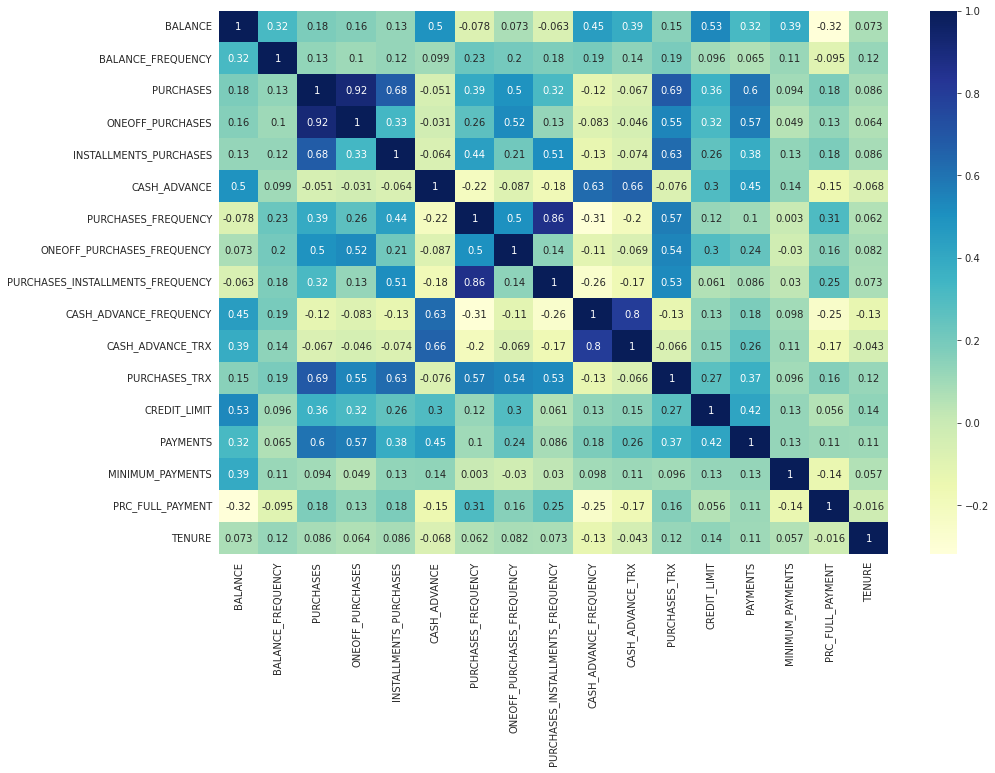

In [61]:
f, ax = plt.subplots(figsize=(15,10 ))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

***The Atrribute ONEOFF_PURCHASES and PURCHASES are highly correlated.hence one of the column is removed***

In [62]:
df.drop('ONEOFF_PURCHASES',axis=1,inplace=True) # highly correlated attribute has been removed.

###  **Q.3 Dimensionality Reduction using PCA**

---

In [76]:
df_pca=df.copy()
df_pca.drop('CUST_ID',axis=1,inplace=True)

In [79]:
df_st =  StandardScaler().fit_transform(df_pca)  


In [82]:
pd.DataFrame(df_st, columns=df_pca.columns).head(5)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


In [110]:
pca = PCA(n_components=11)
pca.fit(df_st)

PCA(n_components=11)

In [111]:
print(pca.explained_variance_)

[4.1610935  3.43304052 1.322953   1.24885836 1.04110975 0.92509775
 0.81053948 0.70594836 0.65064849 0.51022272 0.30485125]


In [112]:
print(pca.explained_variance_ratio_)

[0.26003929 0.21454106 0.08267532 0.07804493 0.06506209 0.05781215
 0.05065306 0.04411684 0.04066099 0.03188536 0.01905107]


In [113]:
print("variance by all the components=",sum(pca.explained_variance_ratio_*100))

variance by all the components= 94.45421510410614


###  **Q.4 Optimum value of K for K-means clustering using elbow method**

---

In [66]:
df1=df.copy()
df1.drop('CUST_ID',inplace=True,axis=1)

In [67]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(df1)
df1=scale.transform(df1)

In [68]:
df_scaled=pd.DataFrame(df1)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


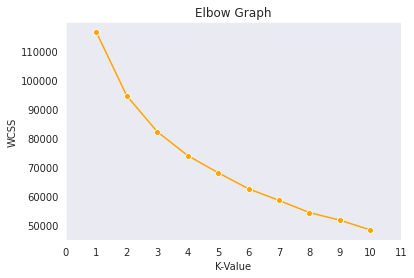

In [114]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 11)
    kmeans.fit(df_scaled.iloc[:,3:])
    wcss.append(kmeans.inertia_)
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="orange", marker ="8")
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

***The optimal value of K in Elbow method is 3***

###  **Q.5 Optimum value of K for K-means clustering using Silhouette method**

---

In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[4,5,6,7,8]
for k in n_clusters:
          cluster=KMeans(n_clusters=k,random_state=10)
          predict=cluster.fit_predict(df_scaled)
          score=silhouette_score(df_scaled,predict,random_state=10)
          print("(for n_clusters={},silhouette_score  is {})".format(k,score))

(for n_clusters=4,silhouette_score  is 0.19894374173601212)
(for n_clusters=5,silhouette_score  is 0.19639268894325015)
(for n_clusters=6,silhouette_score  is 0.20733369177964173)
(for n_clusters=7,silhouette_score  is 0.2116301183517752)
(for n_clusters=8,silhouette_score  is 0.22381394500602927)


***We can see that the silhouette score is maximum at k = 8. So, we will take 8 clusters.***